# Precict city identity from temperature values

In [4]:
#import libraries 
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import seaborn as sns
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

In [1]:
import os

In [3]:
os.getcwd()

'/Users/kristinpredeck/Documents'

## Data preparation and cleaning

In [15]:
#read in data
df = pd.read_csv("city.csv")
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [16]:
#check shape
df.shape

(239177, 7)

In [25]:
#subset for Berlin
cities = df[df["City"] == "Berlin"]
cities.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
24500,1743-11-01,6.326,1.601,Berlin,Germany,52.24N,13.14E
24501,1743-12-01,NaN,NaN,Berlin,Germany,52.24N,13.14E
24502,1744-01-01,NaN,NaN,Berlin,Germany,52.24N,13.14E
24503,1744-02-01,NaN,NaN,Berlin,Germany,52.24N,13.14E
24504,1744-03-01,NaN,NaN,Berlin,Germany,52.24N,13.14E


In [27]:
#subset for NY
cities2 = df[df["City"] == "New York"]
cities2.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
169769,1743-11-01,3.264,1.665,New York,United States,40.99N,74.56W
169770,1743-12-01,NaN,NaN,New York,United States,40.99N,74.56W
169771,1744-01-01,NaN,NaN,New York,United States,40.99N,74.56W
169772,1744-02-01,NaN,NaN,New York,United States,40.99N,74.56W
169773,1744-03-01,NaN,NaN,New York,United States,40.99N,74.56W


In [33]:
#merge subsetted dataframes
data = pd.concat([cities, cities2])
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
24500,1743-11-01,6.326,1.601,Berlin,Germany,52.24N,13.14E
24501,1743-12-01,NaN,NaN,Berlin,Germany,52.24N,13.14E
24502,1744-01-01,NaN,NaN,Berlin,Germany,52.24N,13.14E
24503,1744-02-01,NaN,NaN,Berlin,Germany,52.24N,13.14E
24504,1744-03-01,NaN,NaN,Berlin,Germany,52.24N,13.14E
...,...,...,...,...,...,...,...
173003,2013-05-01,15.544,0.281,New York,United States,40.99N,74.56W
173004,2013-06-01,20.892,0.273,New York,United States,40.99N,74.56W
173005,2013-07-01,24.722,0.279,New York,United States,40.99N,74.56W
173006,2013-08-01,21.001,0.323,New York,United States,40.99N,74.56W


In [45]:
#drop missing values
data = data.dropna()

# Build models

In [41]:
#import libraries
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [46]:
#select features for prediction
Feature = data[['AverageTemperature', 'AverageTemperatureUncertainty']]

In [47]:
#make X for training/testing
X = Feature
X[0:5]

,AverageTemperature,AverageTemperatureUncertainty
24500,6.326,1.601
24505,9.536,2.761
24506,12.579,1.223
24507,14.809,1.398
24508,17.275,1.348


In [48]:
#make y (dependent variable) for training/testing
y = data['City']
y[0:5]

24500    0
24505    0
24506    0
24507    0
24508    0
Name: City, dtype: int64

In [49]:
#split data 
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state =4)

## KNN

In [79]:
# KNN (k nearest neighbors)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

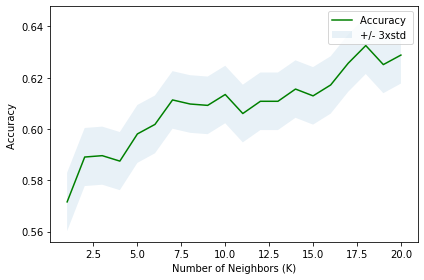

In [81]:
#find best k
mean_acc=np.zeros(20)
std_acc = np.zeros(20)
for i in range(1,21):
    knnmodel=KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred=knnmodel.predict(X_test)
    mean_acc[i-1]=accuracy_score(y_test,y_pred)
    std_acc[i-1]=np.std(y_pred==y_test)/np.sqrt(y_pred.shape[0])
    
plt.plot(range(1,21),mean_acc,'g')
plt.fill_between(range(1,21),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [82]:
print( "Highest accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1)

Highest accuracy 0.6325556733828208 with k= 18


## SVM

In [53]:
#SVM (support vector machine)
from sklearn import svm
svm=svm.SVC(kernel='rbf', probability=True)
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [54]:
y_pred=svm.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 1, 0])

In [55]:
metrics.accuracy_score(y_test,y_pred)

0.6325556733828208

## Logistic Regression

In [56]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
lr=LogisticRegression(C=0.01,solver='liblinear').fit(X_train,y_train)

In [57]:
y_pred=lr.predict(X_test)
print(y_pred)
print(lr.predict_proba(X_test))

[1 1 1 ... 1 0 0]
[[0.48040451 0.51959549]
 [0.49241205 0.50758795]
 [0.4826974  0.5173026 ]
 ...
 [0.48685336 0.51314664]
 [0.50189663 0.49810337]
 [0.53208879 0.46791121]]


In [58]:
metrics.accuracy_score(y_test,y_pred)

0.5090137857900318

# Model evaluation metrics

In [71]:
#import libraries
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

## KNN

In [72]:
# Estimate KNN model and report outcomes
knn = KNeighborsClassifier(n_neighbors=18)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67       933
           1       0.68      0.51      0.59       953

    accuracy                           0.63      1886
   macro avg       0.64      0.63      0.63      1886
weighted avg       0.64      0.63      0.63      1886

Accuracy score:  0.63
F1 Score:  0.59


## SVM

In [75]:
# Estimate SVM model and report outcomes
svm = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.59      0.84      0.69       933
           1       0.73      0.43      0.54       953

    accuracy                           0.63      1886
   macro avg       0.66      0.63      0.62      1886
weighted avg       0.66      0.63      0.62      1886

Accuracy score:  0.63
F1 Score:  0.54


## Logistic Regression

In [73]:
# Estimate LR model and report outcomes
lr = lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

           0       0.50      0.48      0.49       933
           1       0.51      0.53      0.52       953

    accuracy                           0.51      1886
   macro avg       0.51      0.51      0.51      1886
weighted avg       0.51      0.51      0.51      1886

Accuracy score:  0.51
F1 Score:  0.52
